# Softmax Regression

## Softmax function and regression model

The softmax function turns a collection of scalars into a probability distribution. 
\begin{equation}
\mathrm{softmax}(\mathbf{o})_j = \frac{\exp(o_j)}{\sum_k\exp(o_k)}
\end{equation}

The softmax regression model asserts that
$$\mathbf{o} = \mathbf{x}^T\mathbf{w}$$
\begin{equation}
\mathbf{\hat{y}} = \mathrm{softmax}(\mathbf{o})
\end{equation}
Note that we can still call softmax regression a linear model since 
\begin{equation}
\mathrm{argmax}(\hat{y}_j) = \mathrm{argmax}(o_j)
\end{equation}
However our loss function is still different!

## Cost function
We again look at negative log-likelihood. 
$$\begin{aligned}
-\log p(\mathbf{Y}\mid\mathbf{X}) &= \sum_{i=1}^n-\log p(\mathbf{y}\mid \mathbf{x}) \\
&= -\sum_{i=1}^n\sum_{j=1}^q y_j\log\hat{y}_j
\end{aligned}$$
This is called the *cross-entropy loss*. For notational convenience, we write
$$l(\mathbf{y}^i, \mathbf{\hat{y}}^i) = -\sum_{j=1}^q y_j\log\hat{y}_j$$
And we have 
$$l(\mathbf{y}^i, \mathbf{\hat{y}}^i) = \log\sum_{k=1}^q\exp(o_k) - \sum_{k=1}^qy_jo_j$$

# Fashion-MNIST dataset

In [1]:
import torch
import torchvision
from torch.utils import data
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 'ToTensor' converts image data to tensors
# and divides all values by 255
trans = torchvision.transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="data", train=False, transform=trans, download=True)

In [2]:
mnist_train[0][0].shape, mnist_train[0][1]

(torch.Size([1, 28, 28]), 9)

In [3]:
# Returns text labels for list of categories
def get_fashion_mnist_labels(labels):  #@save
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 
                   'coat','sandal', 'shirt', 'sneaker', 'bag', 
                   'ankle boot']
    return [text_labels[int(i)] for i in labels]

't-shirt'

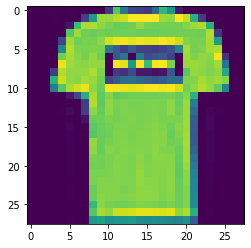

In [4]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=60000)))
plt.imshow(X[1][0])
get_fashion_mnist_labels(y)[1]

In [5]:
# Defines the training and test data iterators
batch_size = 300

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=4)
test_iter = data.DataLoader(mnist_train, batch_size, shuffle=False,
                           num_workers=4)

In [6]:
import numpy as np
from torch import nn

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);


In [7]:
loss = nn.CrossEntropyLoss()

In [8]:
# Not really working. 
trainer = torch.optim.SGD(net.parameters(), lr=0.05)

num_epochs = 10

for epoch in range(num_epochs): 
    for X, y in train_iter: 
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    print("epoch ", epoch, ", loss ", l)

epoch  0 , loss  tensor(0.7070, grad_fn=<NllLossBackward>)
epoch  1 , loss  tensor(0.6010, grad_fn=<NllLossBackward>)
epoch  2 , loss  tensor(0.6090, grad_fn=<NllLossBackward>)
epoch  3 , loss  tensor(0.5445, grad_fn=<NllLossBackward>)
epoch  4 , loss  tensor(0.5146, grad_fn=<NllLossBackward>)
epoch  5 , loss  tensor(0.5754, grad_fn=<NllLossBackward>)
epoch  6 , loss  tensor(0.4698, grad_fn=<NllLossBackward>)
epoch  7 , loss  tensor(0.4785, grad_fn=<NllLossBackward>)
epoch  8 , loss  tensor(0.4776, grad_fn=<NllLossBackward>)
epoch  9 , loss  tensor(0.5460, grad_fn=<NllLossBackward>)


# Train Module

In [9]:
import train
import importlib
importlib.reload(train)

<module 'train' from '/home/zhangir/research_local/lily/learning-deep-learning/train.py'>

## Demonstration of the Animator

<IPython.core.display.Javascript object>


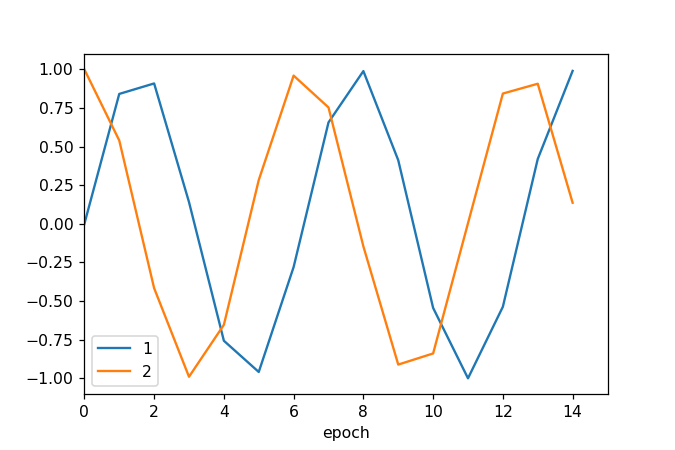

In [10]:
%matplotlib notebook
import time

x = torch.arange(0, 10, dtype=torch.float32)
y = torch.stack((torch.sin(x), torch.cos(x)), dim=1)

graph = train.Animator(("1", "2", "3"), xlim=(0, 15))

graph.add(x, y)

time.sleep(2)

x1 = torch.arange(10, 15, dtype=torch.float32)
y1 = torch.stack((torch.sin(x1), torch.cos(x1)), dim=1)
graph.add(x1, y1)

## Accumulator Class

In [11]:
metrics = train.Accumulator(3)
metrics.add(3, 2, 1)
metrics[2]

1.0

## Trainer

In [12]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

loss = nn.CrossEntropyLoss()

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

trainer = torch.optim.SGD(net.parameters(), lr=0.1)

<IPython.core.display.Javascript object>


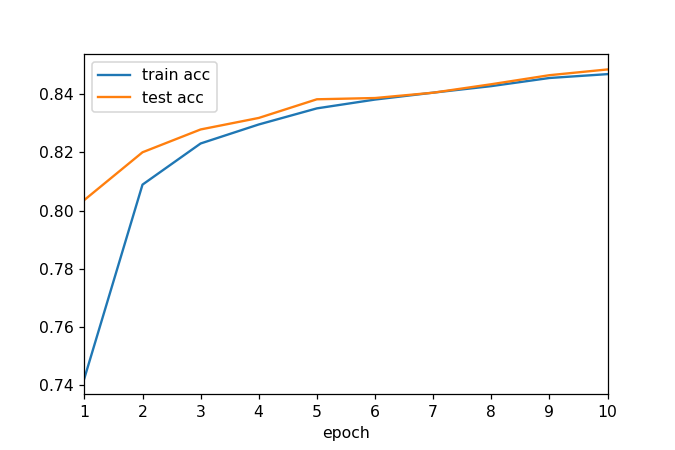

In [13]:
train.train(net, train_iter, test_iter, loss, 10, trainer)